# Exploring Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qbstyles import mpl_style; mpl_style(dark=True)

## Detection Dataset

In [ ]:
df_det_original = pd.read_csv('../../data/raw/detection_data.csv')
df_det_original = df_det_original.drop(['Unnamed: 7','Unnamed: 8'], axis=1)
df_det_original = df_det_original.rename(columns={'Output (S)':'output'})
df_det = df_det_original.copy()
df_det

,output,Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [ ]:
df_det.isnull().sum()

output    0
Ia        0
Ib        0
Ic        0
Va        0
Vb        0
Vc        0
dtype: int64

In [ ]:
(df_det['output'].value_counts()/(df_det['output'].count()))*100

0    54.203816
1    45.796184
Name: output, dtype: float64

In [ ]:
df_det.groupby('output').describe()

Ia                                                            \
         count       mean         std         min         25%        50%   
output                                                                     
0       6505.0  -6.951763   44.821487 -170.472196  -51.282109  -7.222959   
1       5496.0  22.878521  554.781504 -883.542316 -477.607930  17.033143   

                                    Ib             ...        Vb            \
               75%         max   count       mean  ...       75%       max   
output                                             ...                       
0        37.231775  104.097945  6505.0  17.477828  ...  0.410513  0.627875   
1       530.857649  885.738571  5496.0 -78.677828  ...  0.040760  0.605916   

            Vc                                                              \
         count      mean       std       min       25%       50%       75%   
output                                                                       
0       6505.0 -0.002265  0.421680 -0.612709 -0.411891 -0.003967  0.418100   
1       5496.0  0.013556  0.236228 -0.540869 -0.111971  0.010975  0.167047   

                  
             max  
output            
0       0.608243  
1       0.548095  

[2 rows x 48 columns]

In [ ]:
df_det_0 = df_det[df_det['output']==0]
df_det_1 = df_det[df_det['output']==1]

<AxesSubplot:ylabel='Density'>

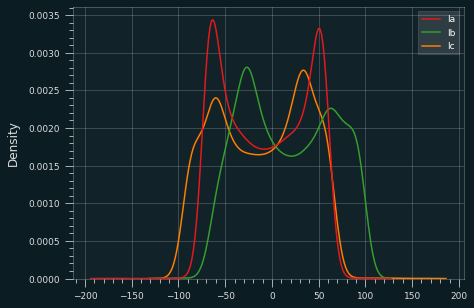

In [ ]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df_det_0.iloc[:,1:4])

<AxesSubplot:ylabel='Density'>

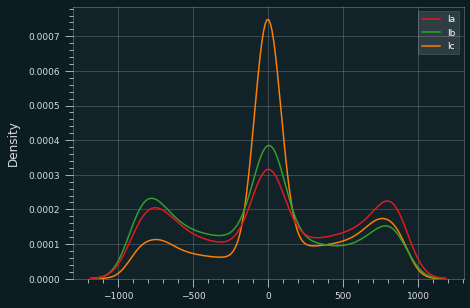

In [ ]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df_det_1.iloc[:,1:4])

<AxesSubplot:ylabel='Density'>

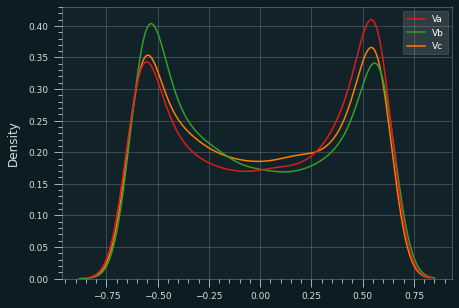

In [ ]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df_det_0.iloc[:,4:7])

<AxesSubplot:ylabel='Density'>

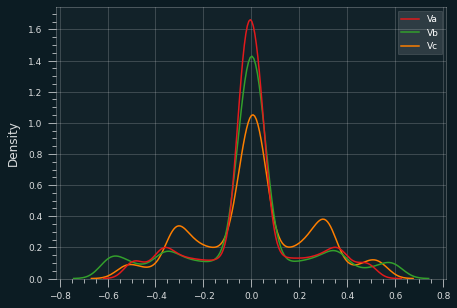

In [ ]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df_det_1.iloc[:,4:7])

<AxesSubplot:ylabel='Density'>

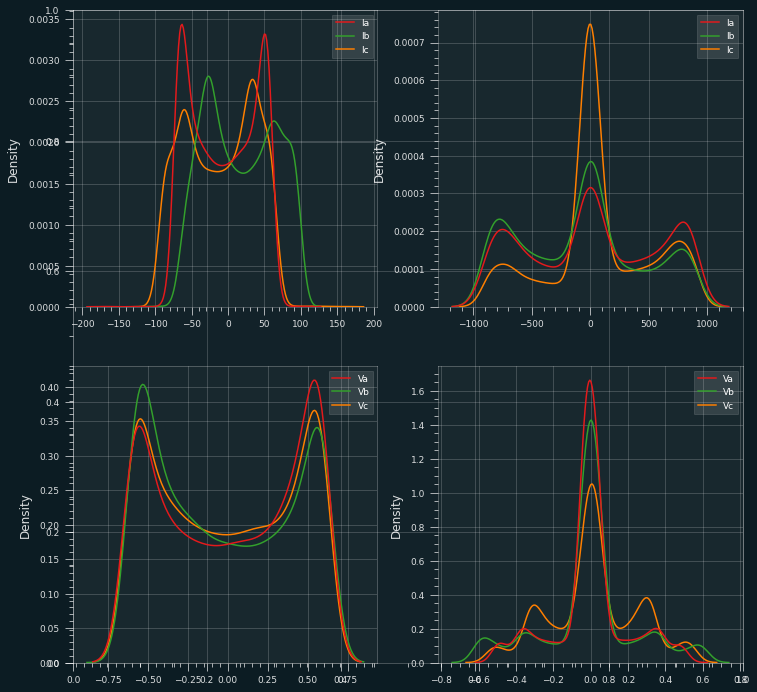

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.kdeplot(ax=axes[0,0], data=df_det_0.iloc[:,1:4])
sns.kdeplot(ax=axes[0,1], data=df_det_1.iloc[:,1:4])
sns.kdeplot(ax=axes[1,0], data=df_det_0.iloc[:,4:7])
sns.kdeplot(ax=axes[1,1], data=df_det_1.iloc[:,4:7])

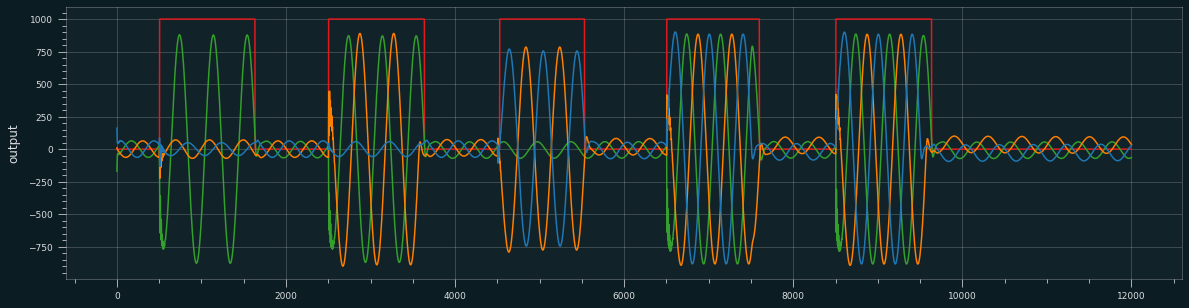

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_det['output']*1000)
for i in df_det.iloc[:,1:4].columns:
    sns.lineplot(data=df_det[i])

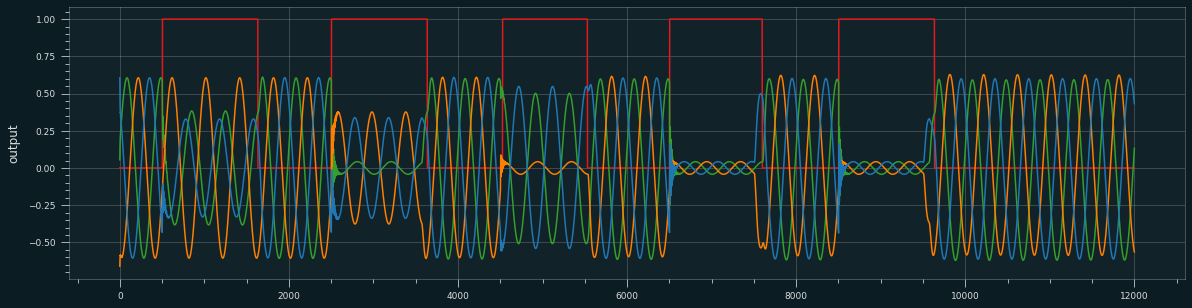

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_det['output'])
for i in df_det.iloc[:,4:].columns:
    sns.lineplot(data=df_det[i])

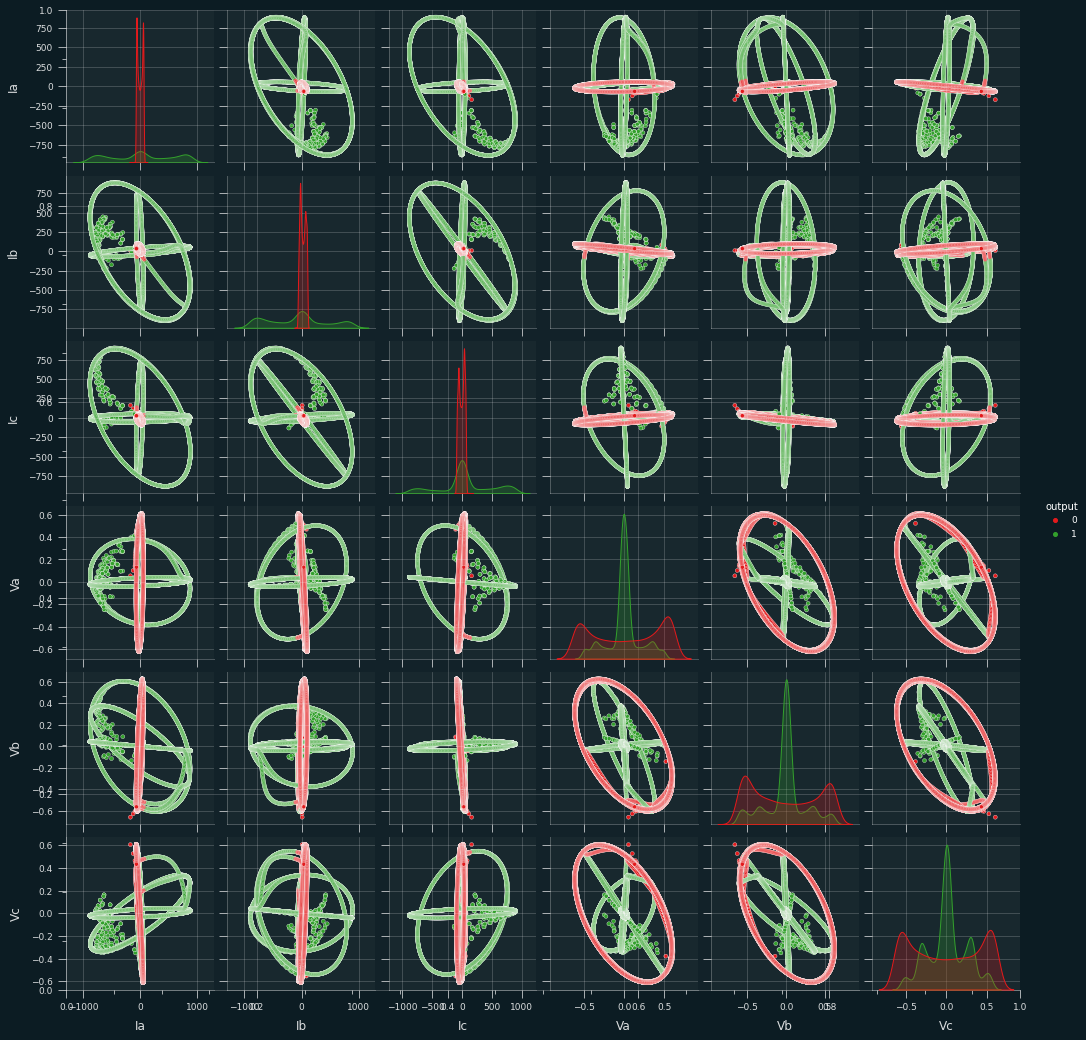

In [ ]:
sns.pairplot(df_det, hue='output')

## Classification Dataset

In [ ]:
df_class_original = pd.read_csv('../../data/raw/classification_data.csv')
df_class = df_class_original.copy()
df_class

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [ ]:
df_class.isnull().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

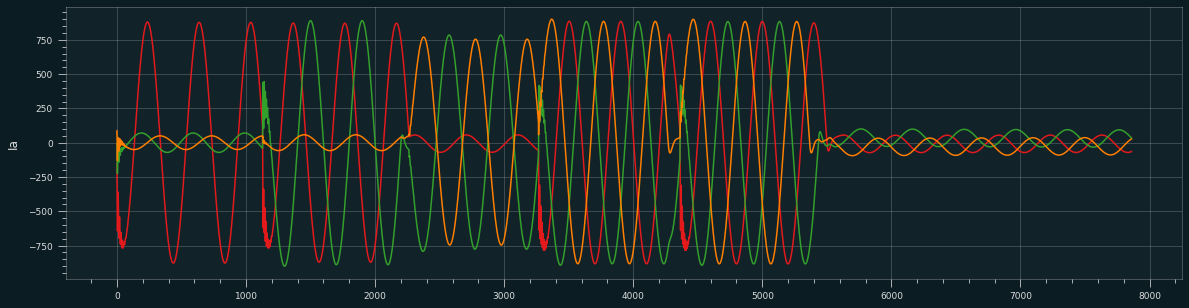

In [ ]:
plt.figure(figsize=(20,5))
for i in df_class.iloc[:,4:7].columns:
    sns.lineplot(data=df_class[i])

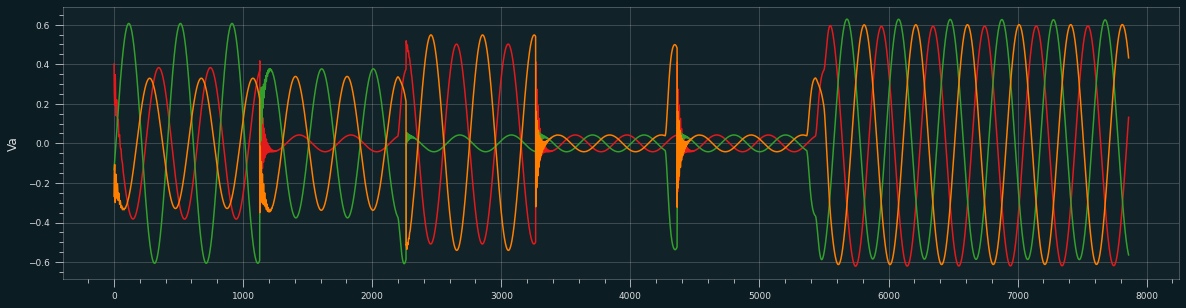

In [ ]:
plt.figure(figsize=(20,5))
for i in df_class.iloc[:,7:].columns:
    sns.lineplot(data=df_class[i])

In [ ]:
df_class['type'] = df_class.iloc[:,0:4].sum(axis=1)
df_class['type'].value_counts()

0    2365
3    2230
2    2133
4    1133
Name: type, dtype: int64

# Visualizing Scaled Data

(Before split)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from qbstyles import mpl_style; mpl_style(dark=True)

In [ ]:
df_original = pd.read_csv('../../data/raw/detection_data.csv')
df_original = df_original.iloc[:,:-2]
df_original = df_original.rename(columns={'Output (S)':'output'})
df = df_original.copy()
df

,output,Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [ ]:
X = df.drop('output', axis=1)
Y = df['output']

In [ ]:
st_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
X_st = st_scaler.fit_transform(X)
X_st = pd.DataFrame(X_st, columns=X.columns)
X_mm = mm_scaler.fit_transform(X)
X_mm = pd.DataFrame(X_mm, columns=X.columns)

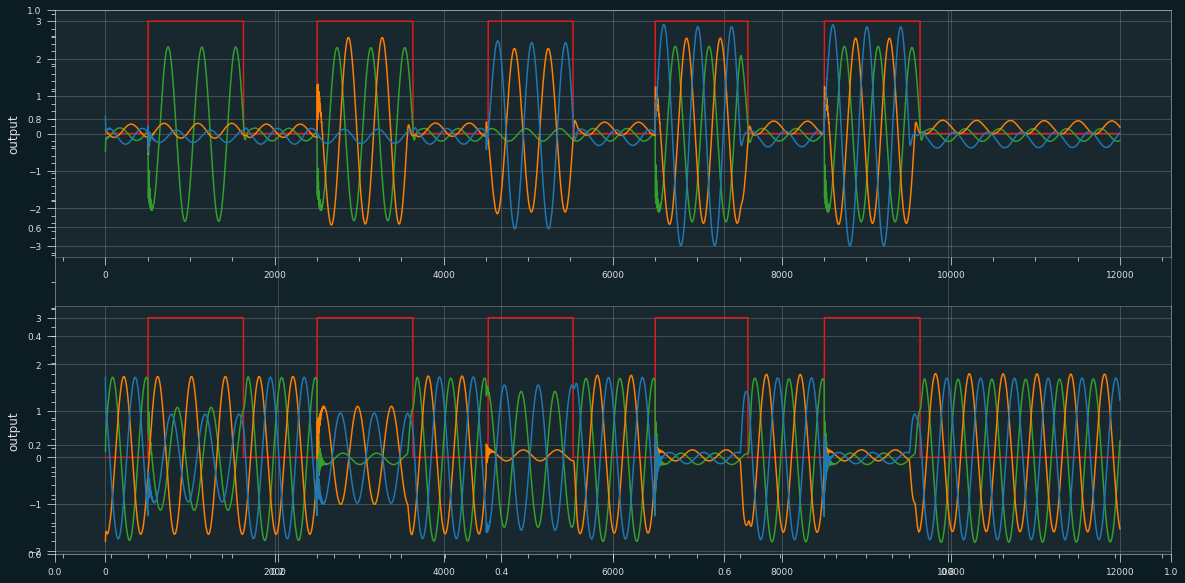

In [ ]:
# StandardScaler
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
# Currents
sns.lineplot(data=Y*3, ax=axes[0])
for i in ['Ia', 'Ib', 'Ic']:
    sns.lineplot(data=X_st[i], ax=axes[0])
# Voltages
sns.lineplot(data=Y*3, ax=axes[1])
for i in ['Va', 'Vb', 'Vc']:
    sns.lineplot(data=X_st[i], ax=axes[1])

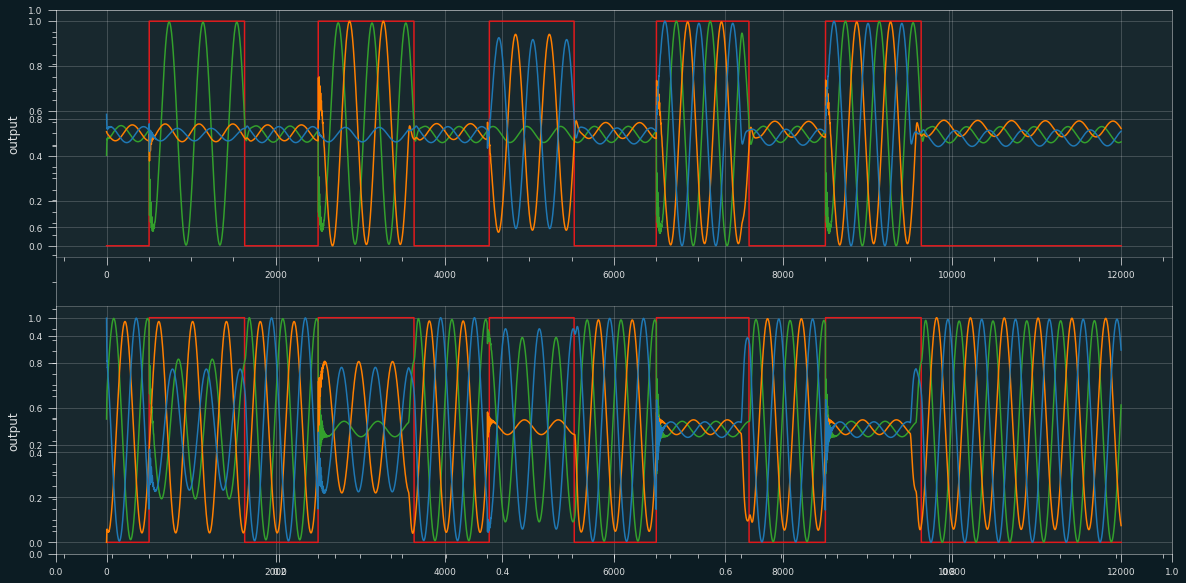

In [ ]:
# MinMaxScaler
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
# Currents
sns.lineplot(data=Y, ax=axes[0])
for i in ['Ia', 'Ib', 'Ic']:
    sns.lineplot(data=X_mm[i], ax=axes[0])
# Voltages
sns.lineplot(data=Y, ax=axes[1])
for i in ['Va', 'Vb', 'Vc']:
    sns.lineplot(data=X_mm[i], ax=axes[1])